In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import igraph as ig
from collections import Counter
import pickle
import math

from src import acgraph as acg
from src import bcloader as bcl
from src import utils as ut
from src import bcgraph as bcg
from efficient_apriori import apriori
from src import xsmining as xsm

In [2]:
usrlabels, usrlabel_to_attvals, usrname_to_usrlabel, \
reslabels, reslabel_to_attvals, resname_to_reslabel, usrlabel_to_reslabel = xsm.load_dataset(name='PM')
print('Num entries:', len(usrlabel_to_reslabel))

Num entries: 960


In [3]:
usratts = set()
for attvals in usrlabel_to_attvals.values():
    for attval in attvals:
        usratts.add(attval[0])

resatts = set()
for attvals in reslabel_to_attvals.values():
    for attval in attvals:
        resatts.add(attval[0])
    
print('Num atts:', len(usratts) + len(resatts))
print('Num attvals:', len(usrlabel_to_attvals) + len(reslabel_to_attvals))

Num atts: 13
Num attvals: 300


In [4]:
#---Create access control graph---
gur = xsm.load_gur(usrlabels, reslabels, usrlabel_to_reslabel, save=False)
print('Num of users:', len(usrlabels))
print('Num of resources:', len(reslabels))
print('Num of edges:', len(gur.es))

Num of users: 100
Num of resources: 200
Num of edges: 960


Num of bcs: 150
Number of covered edges: 580
Number of covered users: 100
Number of covered resources: 180


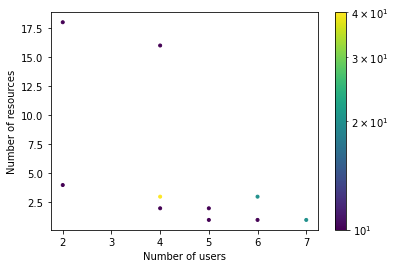

In [6]:
#---Load bicliques---
k = (1,1)
bcs = xsm.load_bicliques('PM', gur, k, usrlabel_to_attvals, reslabel_to_attvals)
print('Num of bcs:', len(bcs))
print('Number of covered edges:', xsm.get_num_covered_edges(bcs))
print('Number of covered users:', xsm.get_num_covered_users(bcs))
print('Number of covered resources:', xsm.get_num_covered_resources(bcs))
xsm.plot_sizes_freq(bcs, None)

In [8]:
#There are no symmetrical

In [9]:
subbcs = xsm.get_subbcs(bcs)
print('Num of bcs with regular patterns:', len(subbcs))
print('Number of covered edges:', xsm.get_num_covered_edges(subbcs))
print('Number of covered users:', xsm.get_num_covered_users(subbcs))
print('Number of covered resources:', xsm.get_num_covered_resources(subbcs))

Num of bcs with regular patterns: 60
Number of covered edges: 440
Number of covered users: 50
Number of covered resources: 180
